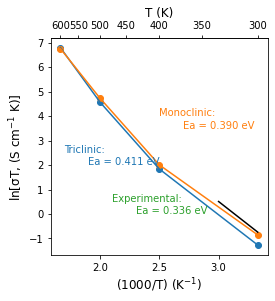

In [5]:
import matplotlib.pyplot as plt
import numpy as np

tri9 = [(0.00232*0.4)*300, (0.0393*0.4)*400, (0.482*0.4)*500, (3.71*0.4)*600]
mono9 = [(0.00351*0.4)*300, (0.0465*0.4)*400, (0.566*0.4)*500, (3.56*0.4)*600]

temp = [300, 400, 500, 600]

ln_tri9 = np.log(tri9)
ln_mono9 = np.log(mono9)

rec_temp = []

for t in temp:
    rec_temp.append(1000/t)

fig, ax = plt.subplots()    

ax.plot(rec_temp, ln_tri9)
ax.plot(rec_temp, ln_mono9)
ax.plot([3.00, 3.33], [0.51, -0.74], color='black')
ax.scatter(rec_temp, ln_tri9)
ax.scatter(rec_temp, ln_mono9)

ax.text(2.5, 4, 'Monoclinic:', color='tab:orange', size=10)
ax.text(2.7, 3.5, 'Ea = 0.390 eV', color='tab:orange', size=10)

ax.text(1.7, 2.5, 'Triclinic:', color='tab:blue', size=10)
ax.text(1.9, 2, 'Ea = 0.411 eV', color='tab:blue', size=10)

ax.text(2.1, 0.5, 'Experimental:', color='tab:green', size=10)
ax.text(2.3, 0, 'Ea = 0.336 eV', color='tab:green', size=10)


ax.set_xlabel('(1000/T) (K$^\mathrm{-1}$)', size = 12)
ax.set_ylabel('ln[$\mathrm{\sigma}$T, (S cm$^\mathrm{-1}$ K)]', size = 12)

def invert(x):
    # 1/x with special treatment of x == 0
    x = np.array(x).astype(float)
    near_zero = np.isclose(x, 0)
    x[near_zero] = np.inf
    x[~near_zero] = (1 / x[~near_zero])*1000
    return x

secax = ax.secondary_xaxis('top', functions=(invert, invert))
secax.set_xlabel('T (K)', size = 12)

def make_square_axes(ax):
    """Make an axes square in screen units.

    Should be called after plotting.
    """
    ax.set_aspect(1 / ax.get_data_ratio())

make_square_axes(plt.gca())

plt.savefig('lnconductivity.jpg', bbox_inches='tight', dpi=500)

In [1]:
import numpy as np

tri9 = [0.00232, 0.0393, 0.482, 3.71]
tri9_ln = []

mono9 = [0.00351, 0.0465, 0.566, 3.56]
mono9_ln = []

temp = [300, 400, 500, 600]
rec_t = []

# 10**2 to conver from cm-1 to m-1 (SI units)

for li, t in zip(tri9, temp):
    tri9_ln.append(np.log(li * 10**2 * t))
    
for li, t in zip(mono9, temp):
    mono9_ln.append(np.log(li * 10**2 * t))
    
for t in temp:
    rec_t.append(1000/t)
    
tri9_slope, intercept = np.polyfit(rec_t, tri9_ln, 1)
tri9_ea = -1000 * tri9_slope * 1.380649 * 10**(-23) * 6.241509 * 10**18
print('Activation energy for tri:', tri9_ea, 'eV')

mono9_slope, intercept = np.polyfit(rec_t, mono9_ln, 1)
mono9_ea = -1000 * mono9_slope * 1.380649 * 10**(-23) * 6.241509 * 10**18
print('Activation energy for mono:', mono9_ea, 'eV')

# Conversion of conductivity to activation energy as follows:
# ln(conductivity * T) = -Ea/kT
# Ea = - ln(conductivity * T) * kT
#
# slope = ln(conductivity * T) / (1000/T)
#
# Ea = -1000 * slope * k
#
# Ea (in eV) = -1000 * slope * k * 1/e

Activation energy for tri: 0.41105600801926917 eV
Activation energy for mono: 0.38991073532198844 eV
